### 1.Baixe a base de dados completa e carregue dentro de DataFrame do pandas.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from utils import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

#### Desafio 1. Realize o processo de extração do dataset diretamente a partir do repositório do github utilizando Python. 

In [2]:
url = 'https://raw.githubusercontent.com/jralbbuquerque/desafio-fadesp-processo-seletivo/217bfc46bfb2b3f4b5f1e71bad917451b52c8d00/data/dataset_desafio_fadesp.csv'

poderia fazer por request. mas esse tipo de arquivo é mais simples. não preciso extrair um ponto respose.text deixando a leitura direto para o read_csv

In [3]:
'''essa linha é só pra mostrar como seria o utilizando a request, mas não existe necessidade aqui.
o read_csv é capaz de lidar com esse path pois já está em csv, porém é necessário passar um encondig, que poderia ser ISO-8859-1
mas decidi usar o latin1.
import requests 
response = requests.get(url)'''
df = pd.read_csv(url,encoding='latin1') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### 2. Realize um processo limpeza nos dados removendo ou substituindo os valores nulos quando necessário, e eliminando dados duplicados e inconsistentes caso exista algum.

In [4]:
df.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### 2.1 (datas em strings multiplas)
aqui percebemos que as coluna 'Order Date' e 'Ship Date' que deveriam estar em datetime não estão, o que é bem comum de ocorrer quando extraímos um df de um csv, porém verificando mais profundamente, vemos que existem dois tipos de string na coluna 'Order Date' ,a de padrão '%m/%d/%Y' '%d-%m-%Y' e a de padrão.

In [5]:
df['Order Date']

0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: Order Date, Length: 51290, dtype: object

In [6]:
df['Ship Date']

0        6/1/2011
1        8/1/2011
2        5/1/2011
3        5/1/2011
4        8/1/2011
           ...   
51285    4/1/2015
51286    5/1/2015
51287    2/1/2015
51288    6/1/2015
51289    4/1/2015
Name: Ship Date, Length: 51290, dtype: object

In [36]:
df['Order Date']= df['Order Date'].apply(convert_mult_format_data)
df['Ship Date']=df['Ship Date'].apply(convert_mult_format_data)
print(df['Order Date'])
print(df['Ship Date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Order Date, Length: 51290, dtype: datetime64[ns]
0       2011-06-01
1       2011-08-01
2       2011-05-01
3       2011-05-01
4       2011-08-01
           ...    
51285   2015-04-01
51286   2015-05-01
51287   2015-02-01
51288   2015-06-01
51289   2015-04-01
Name: Ship Date, Length: 51290, dtype: datetime64[ns]


#### 2.2 Lidando com nulos

In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

detecta-se que a coluna Postal Code é a unica com entradas nulas.

In [10]:
df['Postal Code']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285    94533.0
51286        NaN
51287        NaN
51288        NaN
51289    80538.0
Name: Postal Code, Length: 51290, dtype: float64

Vamos substituir as entradas por 0, depois vamos converter a coluna de cpf para string, pois como é uma informação categorica, não faz sentido poder ser agrupada por funções de agrupamento de variáveis numéricas como soma,max,min,etc..

In [11]:
df['Postal Code'].fillna(0, inplace=True) # that will replace the NAN postal codes with the most frequent one

In [35]:
df['Postal Code'] = df['Postal Code'].astype(int)
df['Postal Code'] = df['Postal Code'].astype(str) # são codigos postais, não fazer sentido terem como propriedade interna soma, o que melhor representa é str
df['Postal Code']

0            0
1            0
2            0
3            0
4            0
         ...  
51285    94533
51286        0
51287        0
51288        0
51289    80538
Name: Postal Code, Length: 51290, dtype: object

#### 2.3 Lidando com duplicatas

In [13]:
df.duplicated().any() # sem valores duplicados

False

#### Desafio 2: Armazene o dataset em um banco de dados chave-valor SQLite e realize consultas em SQL nestes dados.

Com os dados tratados, podemos salvar no banco de dados 'desafio.db' Criarei duas funções pra reutilizar codigo que conecte aos dbs sqlite desse caso.

In [15]:
salva_tabela(df,'pedidos','desafio.db')

True

In [17]:
query = 'select * from  pedidos'
carrega_df(query).head() # dados vindos agora do banco de dados

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [18]:
query2 =  '''
SELECT city,strftime('%Y', "Order Date") AS year,
       COUNT("Product ID") AS 'Pedidos Feitos'
FROM pedidos

GROUP BY year,city
HAVING city in ('Zurich','Aba');
'''

carrega_df(query2)

,City,year,Pedidos Feitos
0,Aba,2011,1
1,Zurich,2011,4
2,Aba,2012,8
3,Zurich,2012,12
4,Aba,2013,1
5,Zurich,2013,7
6,Aba,2014,15
7,Zurich,2014,6


In [19]:
query3 =  '''
SELECT State, Sales
FROM pedidos

WHERE Sales < (SELECT AVG(Sales) FROM pedidos)
'''

carrega_df(query3)

,State,Sales
0,New South Wales,120.366
1,Budapest,66.120
2,Stockholm,44.865
3,New South Wales,113.670
4,New South Wales,55.242
...,...,...
38230,California,13.904
38231,Souss-Massa-Draâ,3.990
38232,Managua,26.400
38233,Chihuahua,7.120


### 3. Utilize técnicas de visualização de dados para explorar a distribuição dos dados.

In [22]:
df.describe().round()


,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.0,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0
mean,25646.0,2013-04-30 17:16:21.384285440,2013-05-05 19:10:10.504971776,246.0,3.0,0.0,29.0,26.0
min,1.0,2011-01-01 00:00:00,2011-01-02 00:00:00,0.0,1.0,0.0,-6600.0,0.0
25%,12823.0,2012-06-06 00:00:00,2012-06-13 00:00:00,31.0,2.0,0.0,0.0,3.0
50%,25646.0,2013-06-26 00:00:00,2013-06-30 00:00:00,85.0,3.0,0.0,9.0,8.0
75%,38468.0,2014-04-30 00:00:00,2014-05-09 00:00:00,251.0,5.0,0.0,37.0,24.0
max,51290.0,2014-12-31 00:00:00,2015-07-01 00:00:00,22638.0,14.0,1.0,8400.0,934.0
std,14806.0,NaN,NaN,488.0,2.0,0.0,174.0,57.0


Sabemos agora as variáveis numéricas com o resultado do describe

#### 3.1 Distribuição das variáveis Numéricas

##### Histogramas
decidi seguir com ajuste manual nos bins cada conjunto. então vamos plotar na abordagem orientada objetos que podemos fazer subplots.

Text(0.5, 1.0, 'Shipping Cost  Histogram')

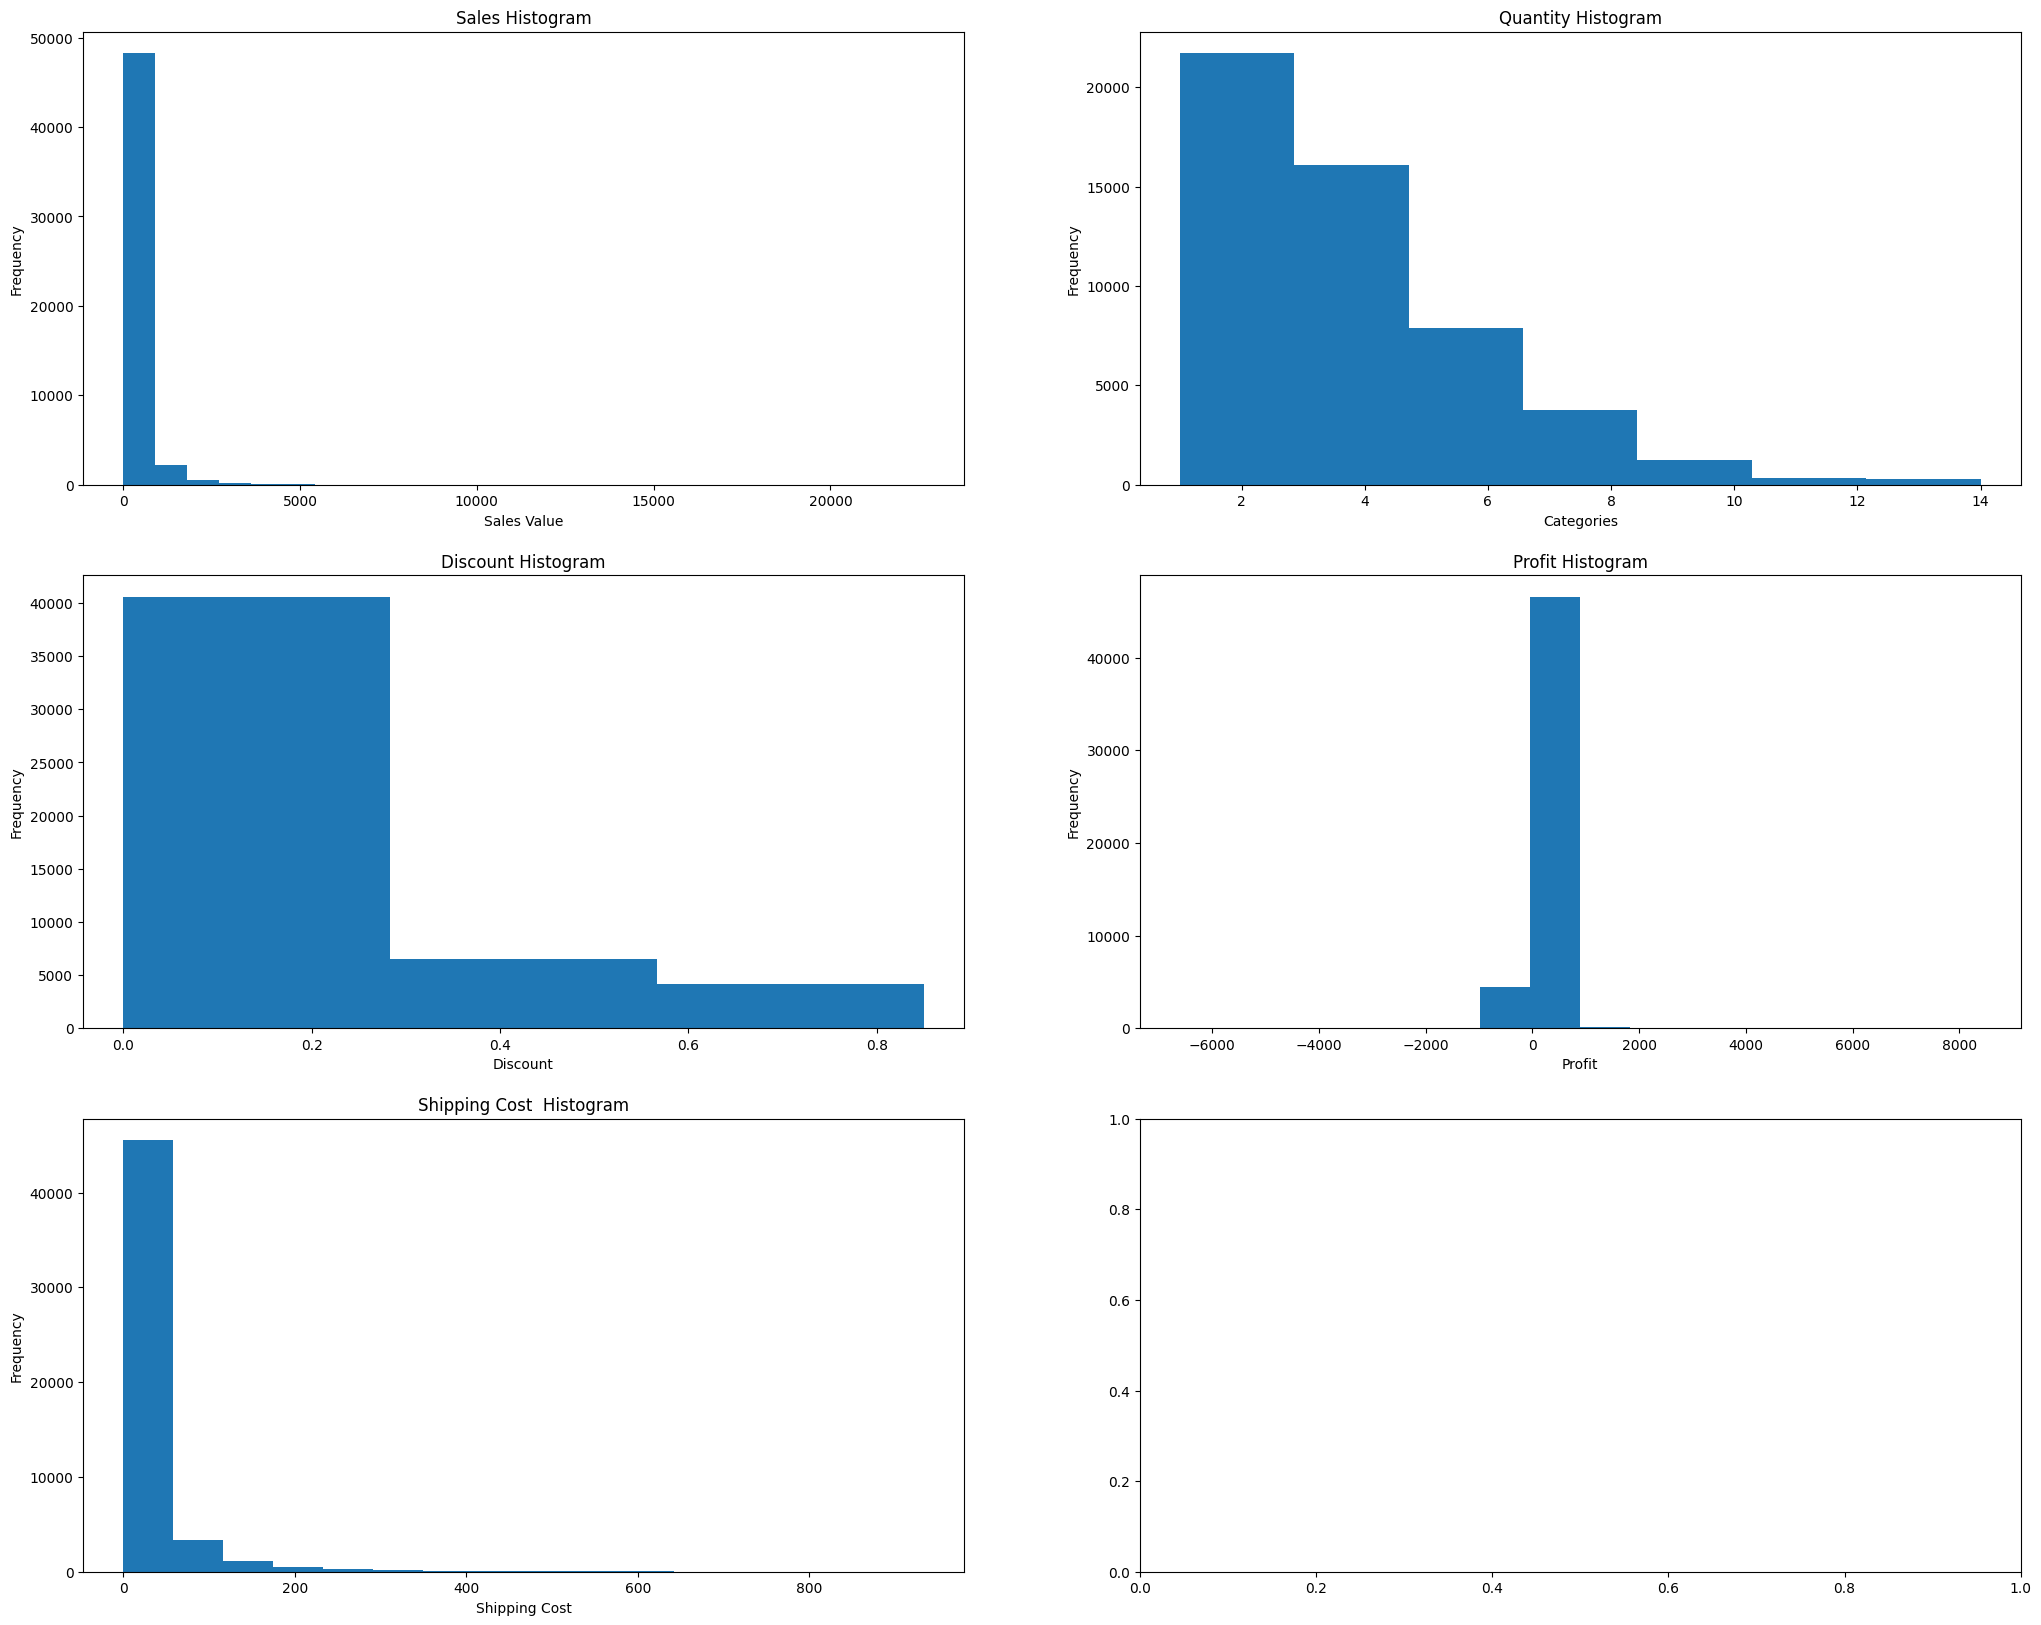

In [30]:
fig1, ax  = plt.subplots(3,2,figsize=(25,20))

ax[0,0].hist(df['Sales'],bins=25)
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Sales Value')
ax[0,0].set_title('Sales Histogram')

ax[0,1].hist(df['Quantity'],bins=7)
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_xlabel('Categories')
ax[0,1].set_title('Quantity Histogram')


ax[1,0].hist(df['Discount'],bins=3)
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel('Discount')
ax[1,0].set_title('Discount Histogram')


ax[1,1].hist(df['Profit'],bins=16)
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_xlabel('Profit')
ax[1,1].set_title('Profit Histogram')

'Shipping Cost' 
ax[2,0].hist(df['Shipping Cost' ],bins=16)
ax[2,0].set_ylabel('Frequency')
ax[2,0].set_xlabel('Shipping Cost' )
ax[2,0].set_title('Shipping Cost  Histogram')

##### Boxplot
Para Boxplot podemos protar com o mesmo comando usando a abordagem orientada a estado do matplotlib.

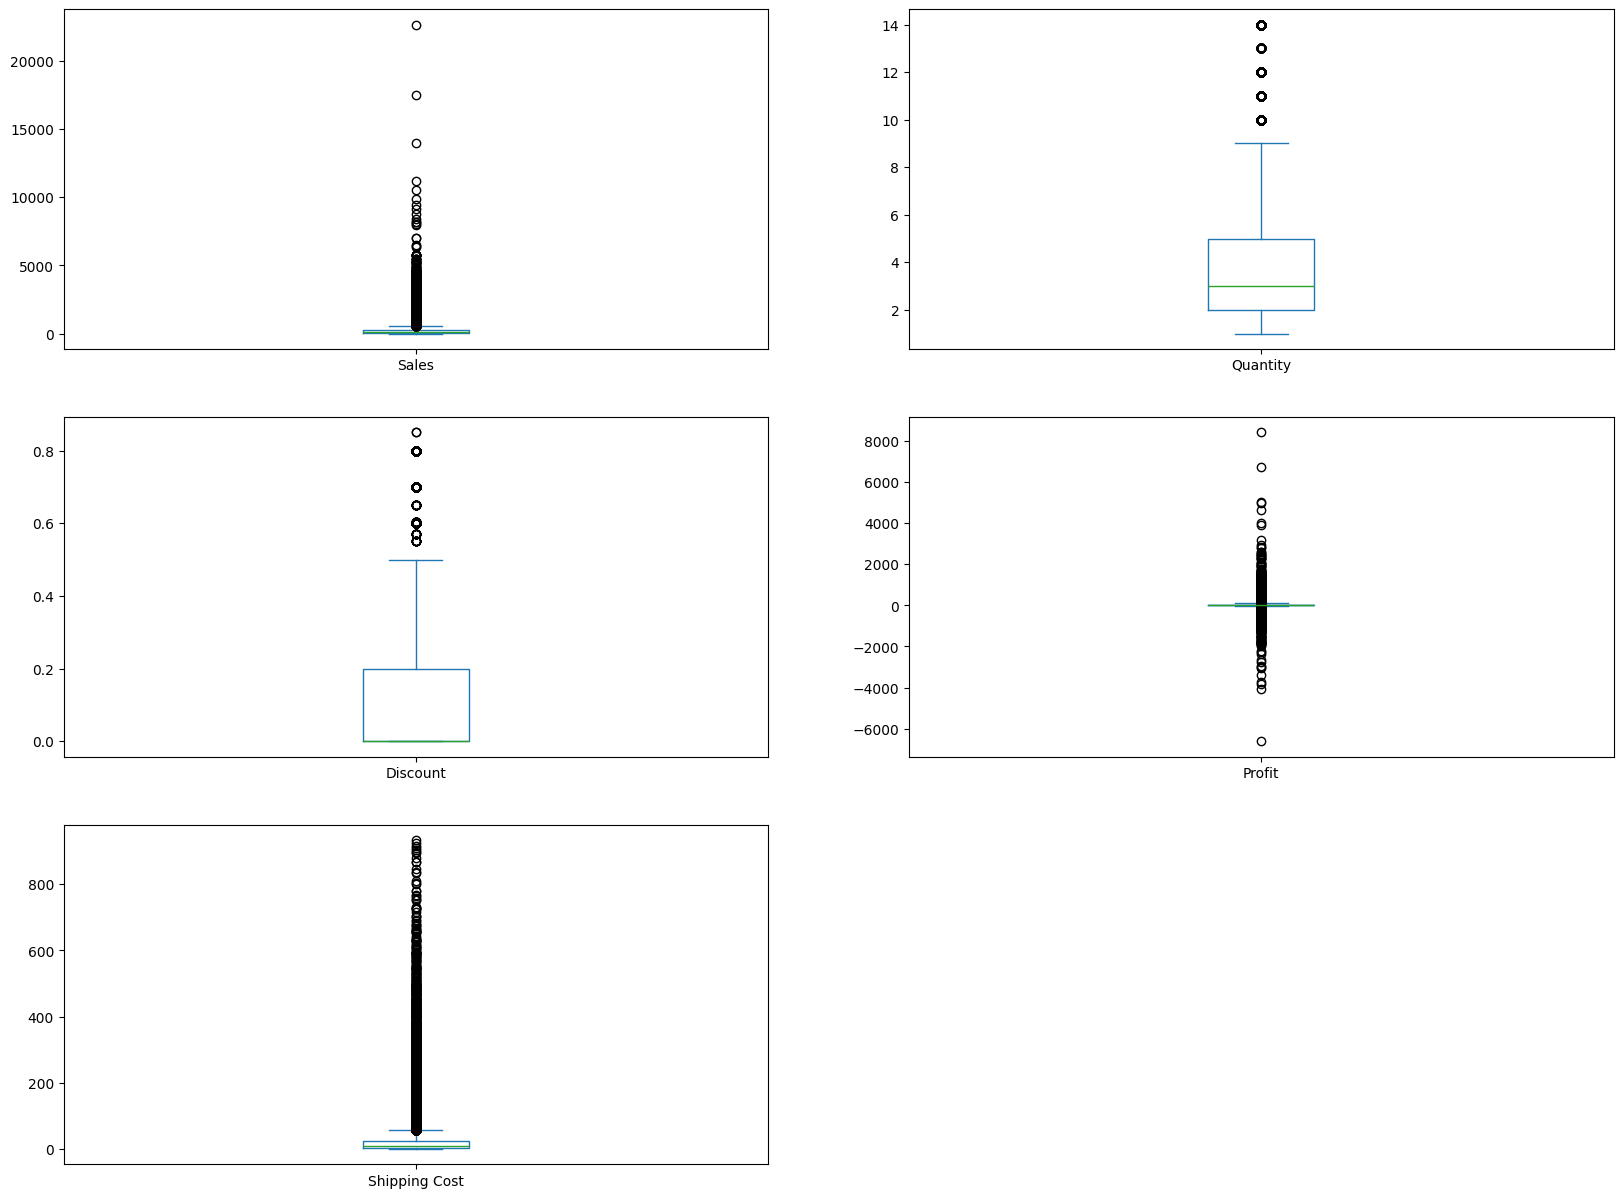

In [32]:
# Box Plots
df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(20,15))
plt.show()

Percebemos que todas as variáveis numéricas tem outliers.

##### Dispersão

Vamos plotar agora a dispersão entre as variáveis de uma vez só usando a biblioteca seaborn.

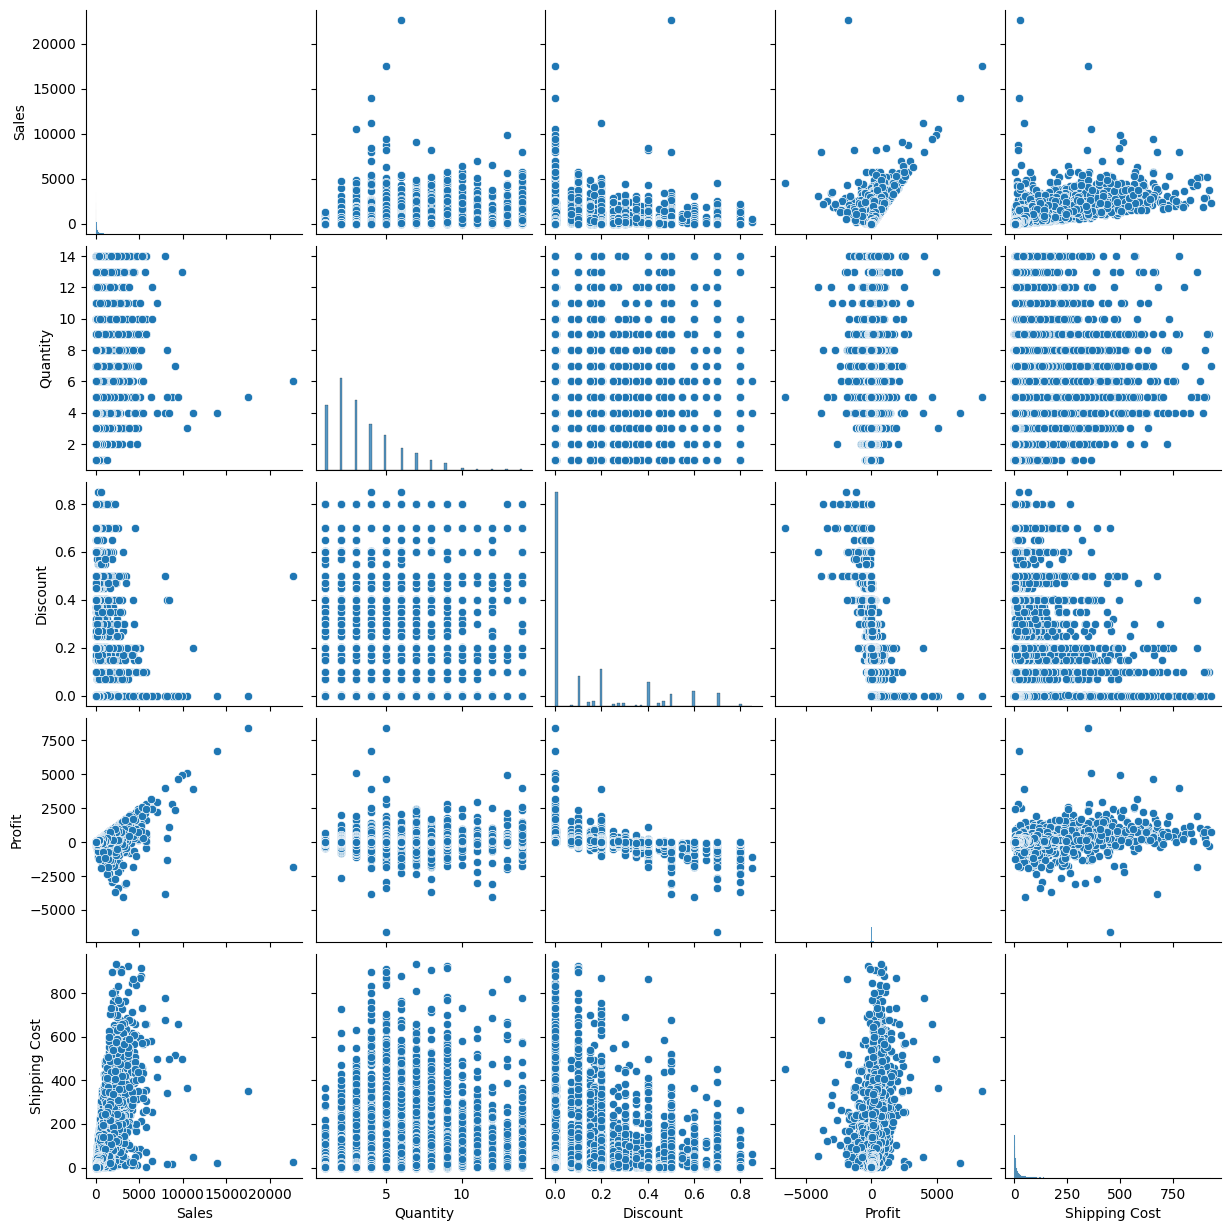

In [33]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']])

##### Heatmap

Agora vamos plotar as correlações entre as variáveis numéricas.

In [34]:
df_num_corr = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].corr()

<Axes: >

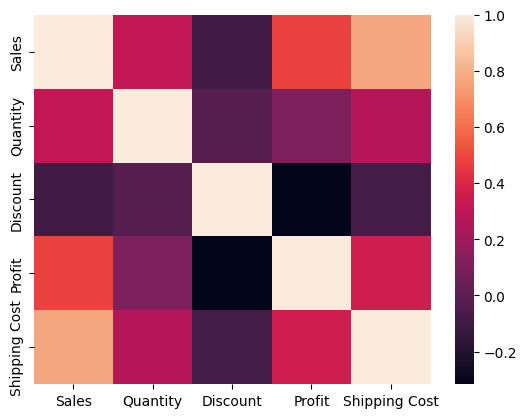

In [35]:
sns.heatmap(df_num_corr)

#### 3.2 Variáveis Categóricas

In [36]:
for column in df.columns: # verificar as variáveis categóricas que possuem menos categorias.
    print("{} Unique Entries:{}".format(column,df[column].unique().shape))

Row ID Unique Entries:(51290,)
Order ID Unique Entries:(25035,)
Order Date Unique Entries:(1430,)
Ship Date Unique Entries:(1464,)
Ship Mode Unique Entries:(4,)
Customer ID Unique Entries:(1590,)
Customer Name Unique Entries:(795,)
Segment Unique Entries:(3,)
City Unique Entries:(3636,)
State Unique Entries:(1094,)
Country Unique Entries:(147,)
Postal Code Unique Entries:(632,)
Market Unique Entries:(7,)
Region Unique Entries:(13,)
Product ID Unique Entries:(10292,)
Category Unique Entries:(3,)
Sub-Category Unique Entries:(17,)
Product Name Unique Entries:(3788,)
Sales Unique Entries:(22995,)
Quantity Unique Entries:(14,)
Discount Unique Entries:(27,)
Profit Unique Entries:(24575,)
Shipping Cost Unique Entries:(10037,)
Order Priority Unique Entries:(4,)


vamos agora pegar algumas variáveis categóricas de interesse, pois possuem poucas categorias em comparação ao resto do Dataframe. Vamos plotar elas em relação a vendas. Vamos plotar elas em relação com maiores vendas.

Text(0.5, 1.0, 'Sales per Region')

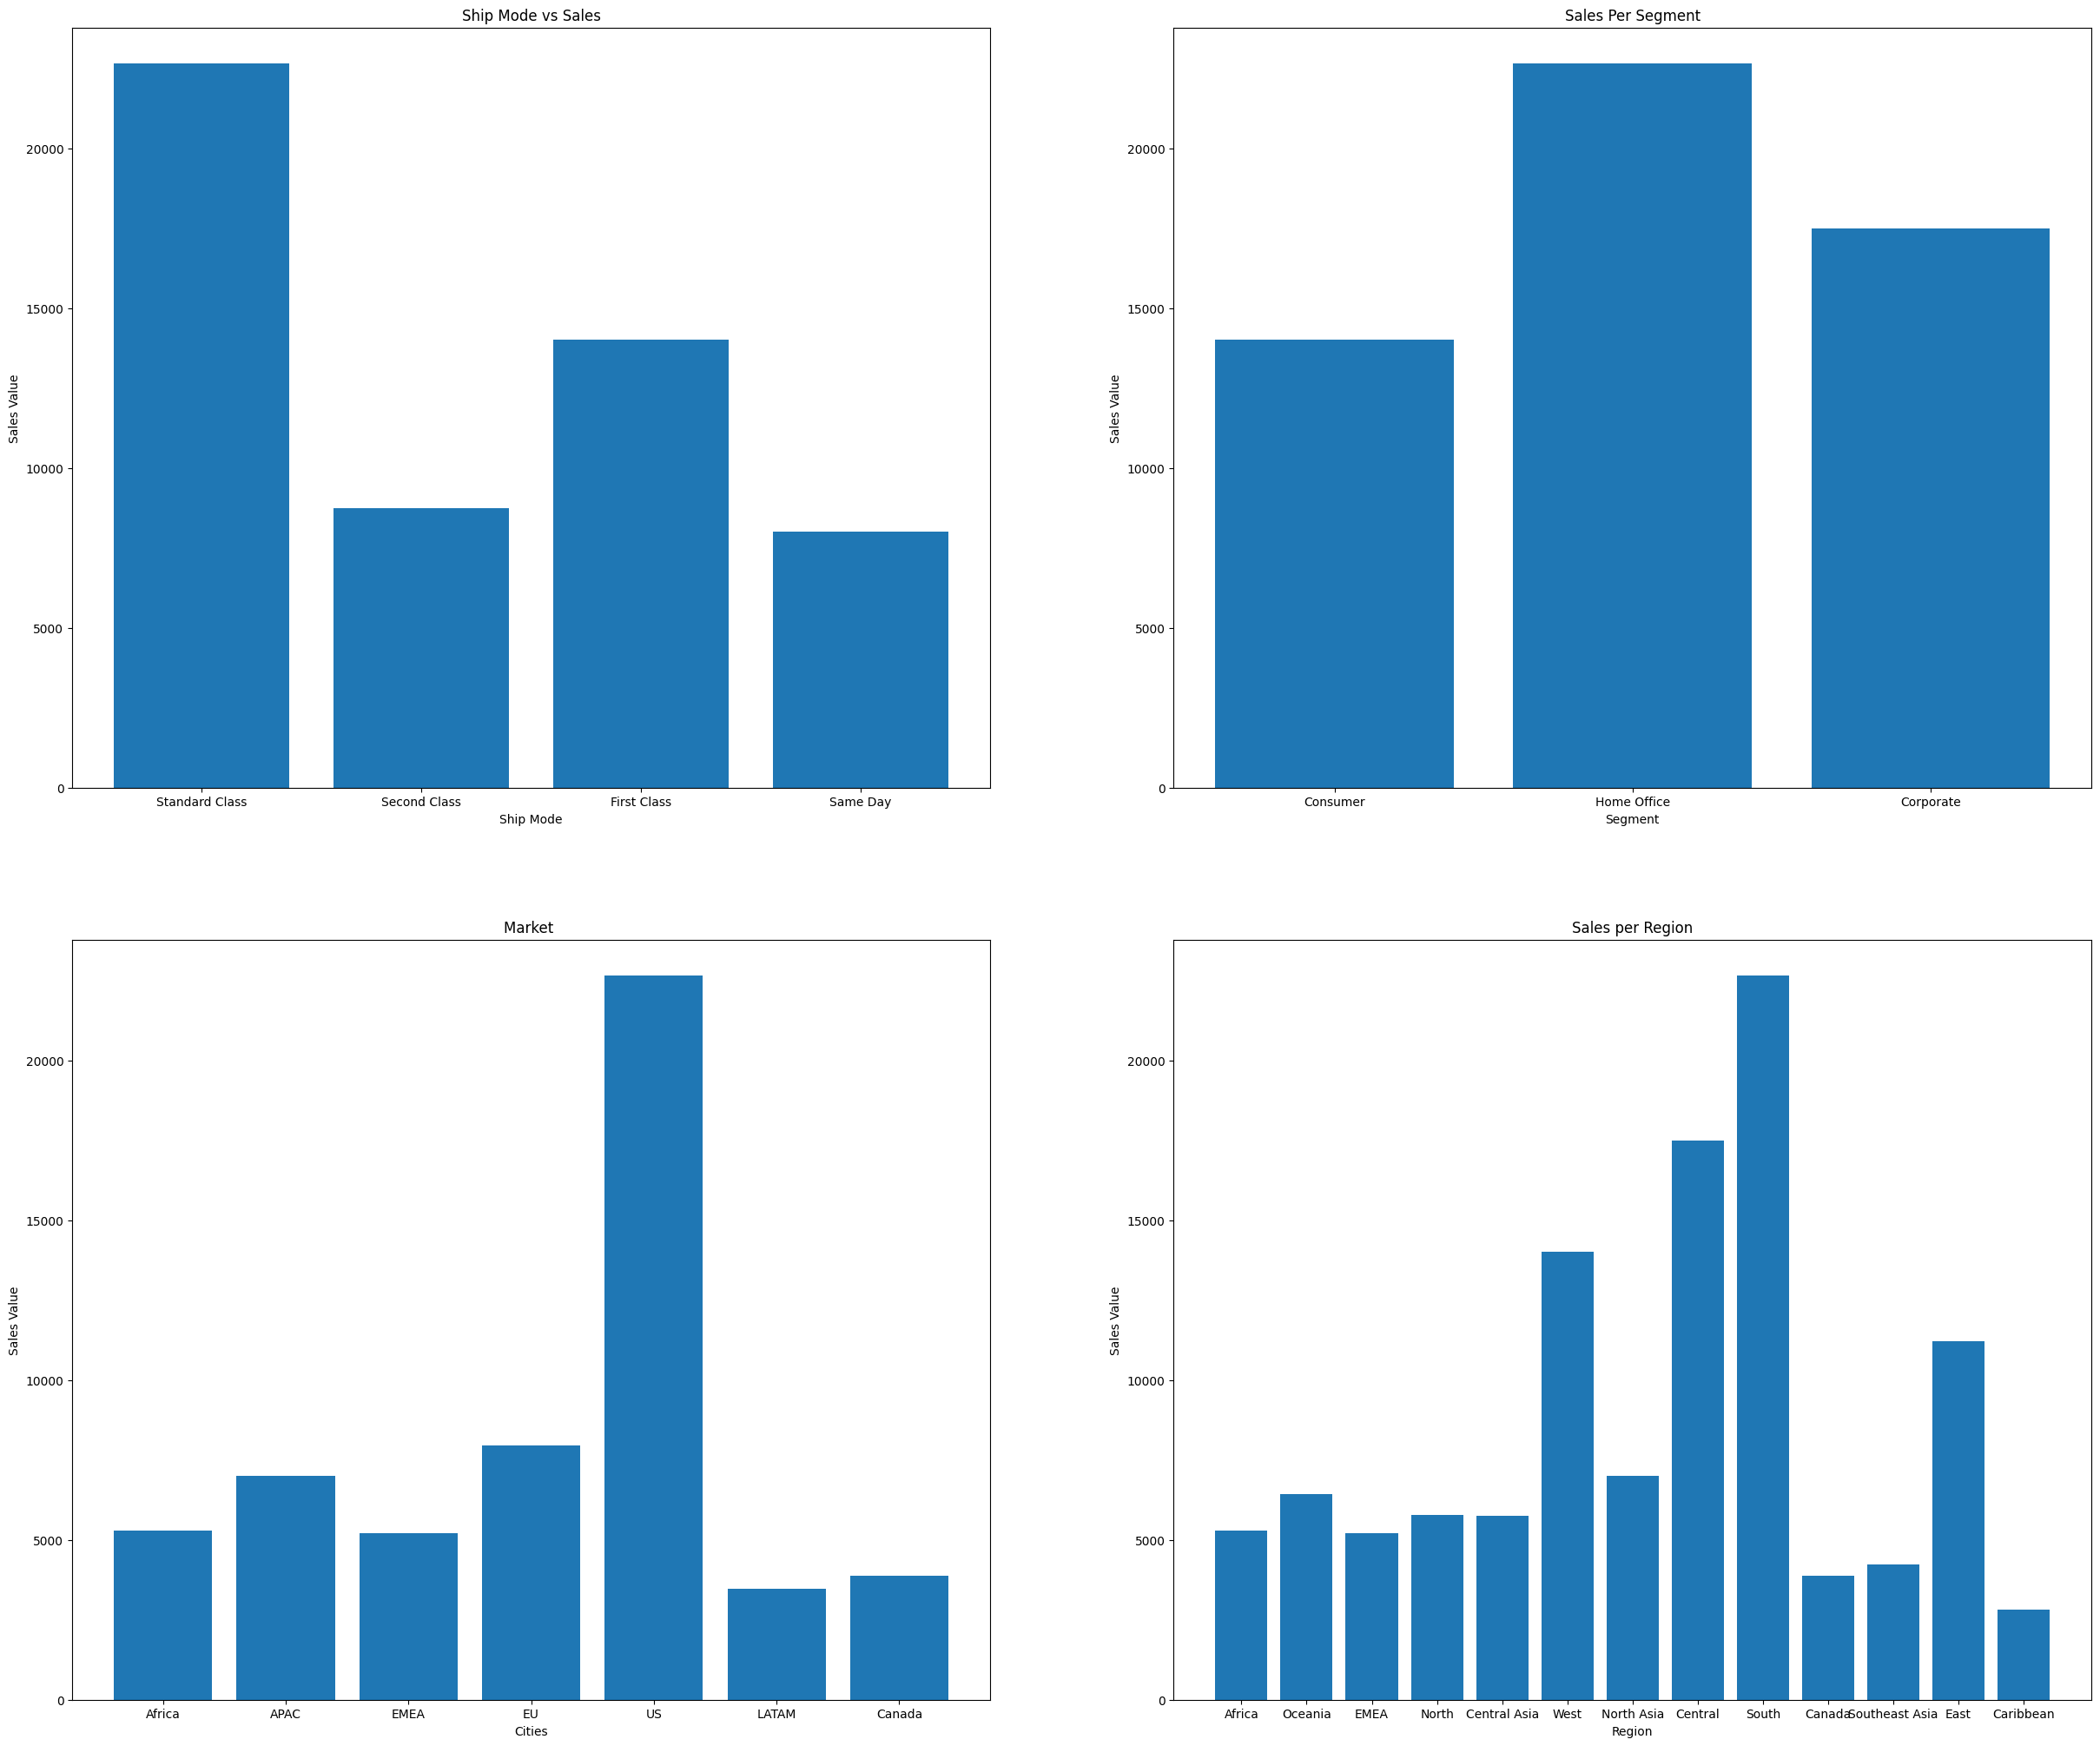

In [39]:
fig2, ax  = plt.subplots(2,2,figsize=(30,25))

ax[0,0].bar(df['Ship Mode'],df['Sales'])
ax[0,0].set_ylabel('Sales Value')
ax[0,0].set_xlabel('Ship Mode')
ax[0,0].set_title('Ship Mode vs Sales')

ax[0,1].bar(df['Segment'],df['Sales'])
ax[0,1].set_ylabel('Sales Value')
ax[0,1].set_xlabel('Segment')
ax[0,1].set_title('Sales Per Segment')

ax[1,0].bar(df['Market'],df['Sales'])
ax[1,0].set_ylabel('Sales Value')
ax[1,0].set_xlabel('Cities')
ax[1,0].set_title('Market Regions ')


ax[1,1].bar(df['Region'],df['Sales'])
ax[1,1].set_ylabel('Sales Value')
ax[1,1].set_xlabel('Region')
ax[1,1].set_title('Sales per Region')

Podemos observar algumas informações bem legais como maior numero de comprasno segmento home office, o maior mercado é os estados unidos, com maiores valores no centro e sul do país se combinarmos com o gráfico de regiçao. Compras são feitas mais na classe economica de entrega.

### 4 Identifique os produtos mais vendidos e analise sua distribuição geográfica.

In [57]:
infos = ['Country','Product Name','Sales']
df_by_most_sold_products=df[infos].groupby(['Product Name','Country']).sum().sort_values('Sales',ascending=False).head()
df_by_most_sold_products

,,Sales
Product Name,Country,
Canon imageCLASS 2200 Advanced Copier,United States,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,United States,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,United States,22638.480
HON 5400 Series Task Chairs for Big and Tall,United States,21870.576
GBC DocuBind TL300 Electric Binding System,United States,19823.479


fazendo esse agrupamento por produto e país,ordenado descendente em sales, temos que os produtos mais vendidos  todos correspondem a compras nos estados unidos.

### 5 Analise a relação entre as vendas e outras variáveis, como o tempo de entrega e o preço dos produtos.

In [20]:
df['Unit Price'] = df.apply(lambda x: x['Sales']/x['Quantity'],axis=1)

In [27]:
def delta_to_delivery(data1, data2):
    return (data2 - data1)

df['Ship Time'] = df.apply(lambda x: delta_to_delivery(x['Order Date'], x['Ship Date']), axis=1)
df['Ship Time'] = df['Ship Time'].dt.days
print('Correlation Sales X Ship Time: ',df['Sales'].corr(df['Ship Time'])) # Correlação Alta
df_grouped_by_price_w_sum = df.groupby('Ship Time')['Unit Price'].sum().sort_values(ascending=False)
df_grouped_by_price_w_sum = df_grouped_by_price_w_sum.reset_index() # são muitos

Correlation Sales X Ship Time:  -0.00120954339265839


Text(0.5, 1.0, 'Dispersion')

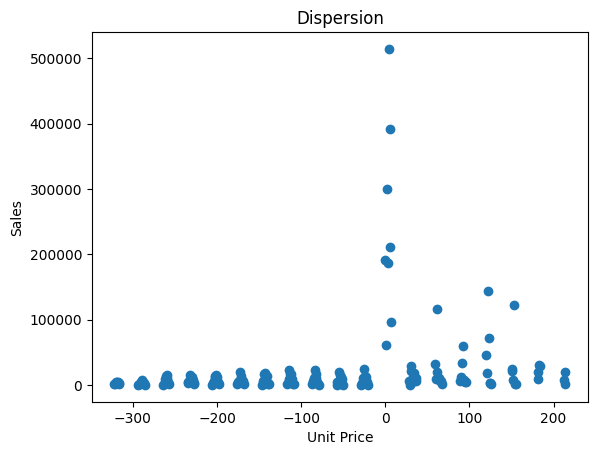

In [28]:
plt.scatter(df_grouped_by_price_w_sum['Ship Time'],df_grouped_by_price_w_sum['Unit Price'])
plt.ylabel('Sales')
plt.xlabel('Unit Price')
plt.title('Dispersion')


Correlation Sales vs Unit Price:  0.8090843384506388


Text(0.5, 1.0, 'Dispersion')

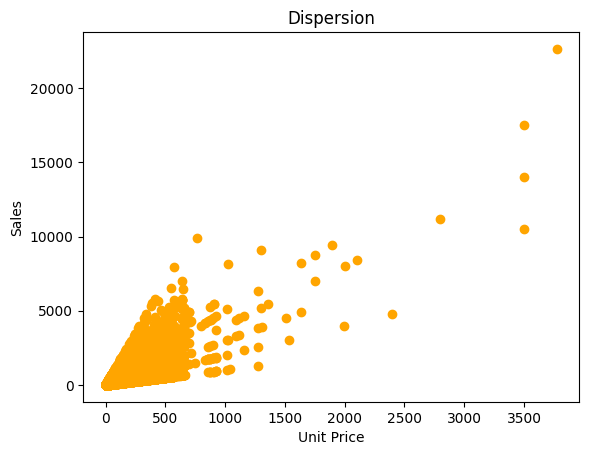

In [32]:
print('Correlation Sales vs Unit Price: ',df['Sales'].corr(df['Unit Price'])) # Correlação Alta

plt.scatter(df['Unit Price'],df['Sales'],color = 'orange')
plt.ylabel('Sales')
plt.xlabel('Unit Price')
plt.title('Dispersion')

A  Correlação entre Sales e Unit Price é alta. è possivel observar graficamente isso

#### Desafio 3 Utilize técnicas de aprendizado de máquina para prever as vendas com base em suas características, como categoria de produto, preço, tempo de entrega, entre outros. Para este desafio, informe as principais métricas de avalição do modelo (MSE, MAE e MAPE). Por fim, crie um gráfico comparativo entre as vendas reais e as vendas previstas pelo modelo.

Usando regressão

In [62]:
x = df[['Quantity', 'Discount','Profit','Shipping Cost']]
y = df['Sales']

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()
scaler.fit(x_training)

x_training = scaler.transform(x_training)
x_test = scaler.transform(x_test)

model_regression = LinearRegression()
model_regression.fit(x_training,y_training)

LinearRegression()

In [63]:
y_prediction = model_regression.predict(x_test)
y_prediction

array([187.16151294,  76.3986095 , 221.03379339, ..., 241.17658469,
       582.79556576,  79.54456786])

Text(0.5, 1.0, 'Dispersion for the Model')

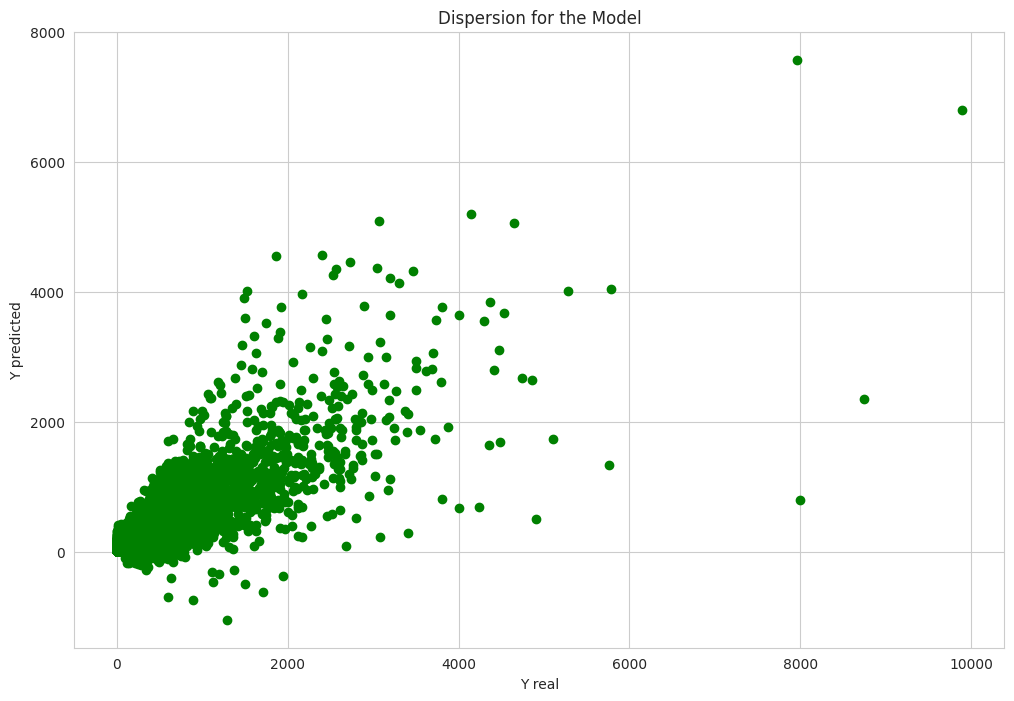

In [65]:
plt.figure(figsize=(12, 8))
plt.scatter(x = y_test, y = y_prediction, color = 'green')
plt.ylabel("Y predicted")
plt.xlabel("Y real")
plt.title('Dispersion for the Model')


In [60]:
explained_variance_score(y_test,y_prediction)

0.695671302174582

Modelo é capaz de explicar 69% da variancia encontrada nos dados, então é interessante.Agora vamos para as métricas

In [61]:
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
score_r2 = r2_score(y_test, y_prediction)
mape = np.mean(np.abs((y_test - y_prediction) / y_test)) # por algum motivo não está encontrando mean_absolute_percentage_error mas podemos calcular dessa forma


print('MAPE:', mape)
print('MAE:', mae)
print('MSE:', mse)
print('MSE:', score_r2)

MAPE: 1.9181364399381942
MAE: 117.56502010060592
MSE: 64112.656852657325
MSE: 0.6956564976777172


#### Desafio 4 Salvar o modelo em pickle


esta etapa é bastante simples:

In [66]:
# arquivo Pickle 
with open("model.pkl", "wb") as file:
    pickle.dump(model_regression, file)

### Desafio 6 Crie uma visualização em dashboard

eu escolhi como padrão o streamlit, que aproveita o potencial de self hosting para criar dashboards

para rodar o streamlit é só usar o comando streamlit run e o path para o dashboard.